<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Pipeline de Dados do Telegram I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Contexto;</li>
  <li>Telegram;</li>
  <li>Dados.</li>
</ol>

---

# **Exercícios**

#**1. Contexto**
##1.1. Chatbot

Chatbots são softwares que simulam conversas com humanos em plataformas de mensagens como Telegram, WhatsApp e Facebook Messenger. Mais do que simples robôs, eles se tornam ferramentas poderosas para empresas que buscam :

* Atender clientes de forma rápida e eficiente.
* Coletar dados valiosos.
* Personalizar a experiência do cliente.

##1.2. Telegram

**Telegram** é uma plataforma de mensagens instantâneas freeware
(distribuído gratuitamente) e, em sua maioria, open source. É muito
popular entre desenvolvedores por ser pioneiro na implantação da
funcionalidade de criação de **chatbots**, que, por sua vez, permitem a
criação de diversas automações.

# 3. Arquitetura
Uma atividade analítica de interesse é a de realizar a análise
exploratória de dados enviadas a um chatbot para responder
perguntas como:
1. Qual o horário que os usuários mais acionam o bot?
2. Qual o problema ou dúvida mais frequente?
3. O bot está conseguindo resolver os problemas ou esclarecer as
dúvidas?


Portanto, vamos construir um pipeline de dados que ingira, processe,
armazene e exponha mensagens de um grupo do Telegram para que
profissionais de dados possam realizar análises. A arquitetura proposta
é dividida em duas: transacional, no Telegram, onde os dados são
produzidos, e analítica, na Amazon Web Services (AWS), onde os dados
são analisados.

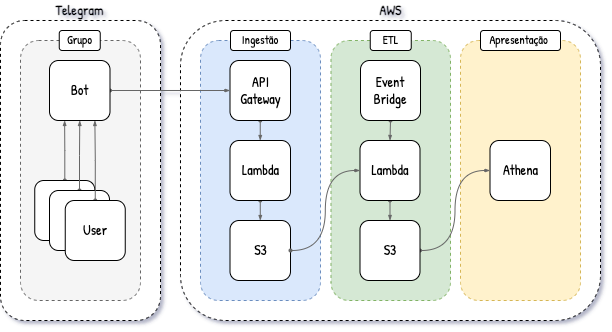

## • Telegram

O `Telegram` representa a fonte de dados transacionais. Mensagens
enviadas por usuários em um grupo são capturadas por um bot e
redirecionadas via webhook do backend do aplicativo para um
endpoint (endereço web que aceita requisições HTTP) exposto pelo
`AWS API Gateway`. As mensagens trafegam no corpo ou payload da
requisição.

## • AWS | Ingestão
Uma requisição HTTP com o conteúdo da mensagem em seu payload é recebia pelo `AWS API Gateway` que, por sua vez, as redireciona para o `AWS Lambda`, servindo assim como seu gatilho. Já o AWS Lambda recebe o payload da requisição em seu parâmetro event, salva o conteúdo em um arquivo no formato JSON (original, mesmo que o payload) e o armazena no AWS S3 particionado por dia.


## • AWS | ETL
Uma vez ao dia, o `AWS Event Bridge` aciona o
`AWS Lambda`que
processa todas as mensagens do dia anterior (atraso de um dia ou
D-1), denormaliza o dado semi-estruturado típico de arquivos no
formato JSON, salva o conteúdo processado em um arquivo no
formato Apache Parquet e o armazena no `AWS S3` particionado por dia.


## • AWS | Apresentação
Por fim, uma tabela do AWS Athena é apontada para o bucket do AWS
S3 que armazena o dado processado: denormalizado, particionado e
orientado a coluna. Profissionais de dados podem então executar
consultas analíticas (agregações, ordenações, etc.) na tabela
utilizando o SQL para a extração de insights.


## 1\. Telegram.

Replique as atividades da aula 2.

1.1. Crie uma conta no **Telegram** caso não possua uma e faça o login na versão web da ferramenta através desse [link](https://web.telegram.org).

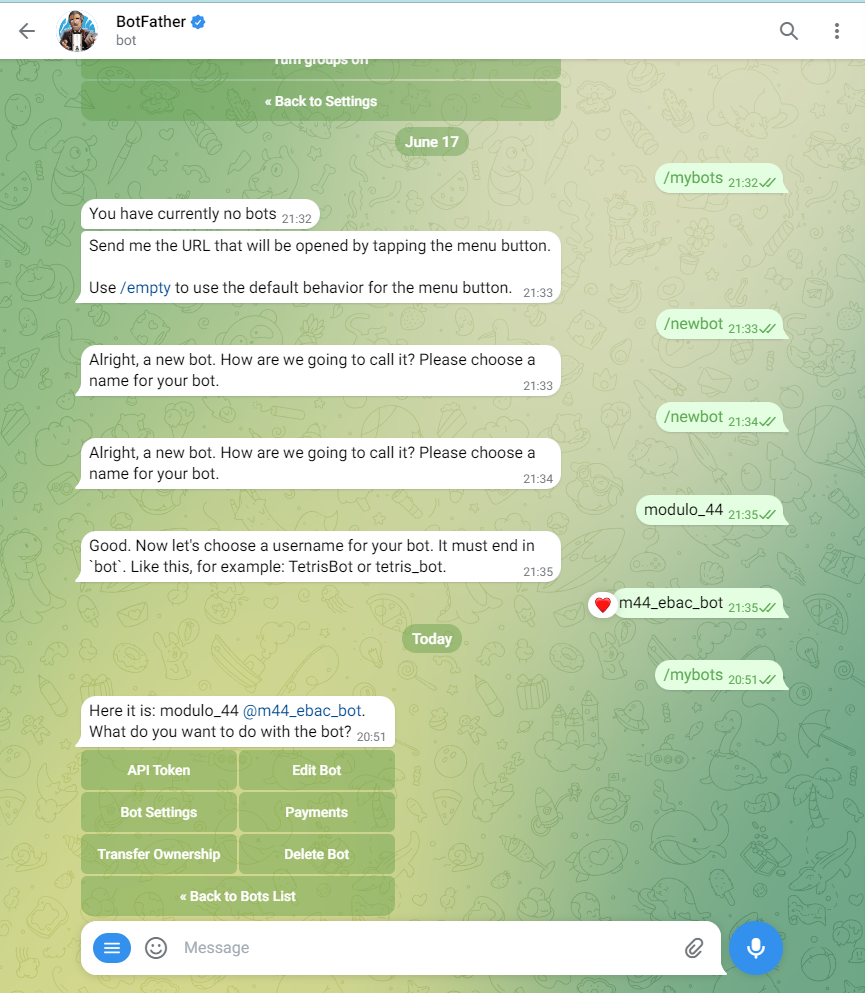

1.3. Crie um grupo e adicione o *bot*.

1.4. Torne o *bot* administrador do grupo.

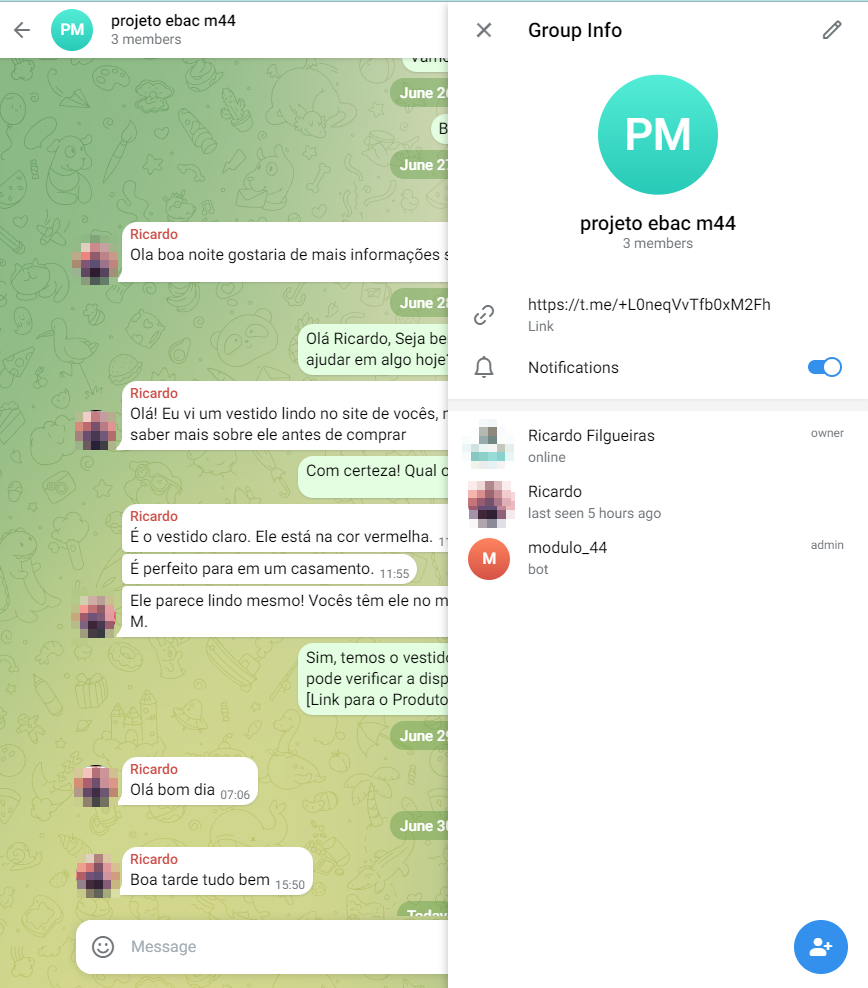

1.5. Desabilite a opção de adicionar o *bot* a novos grupos.

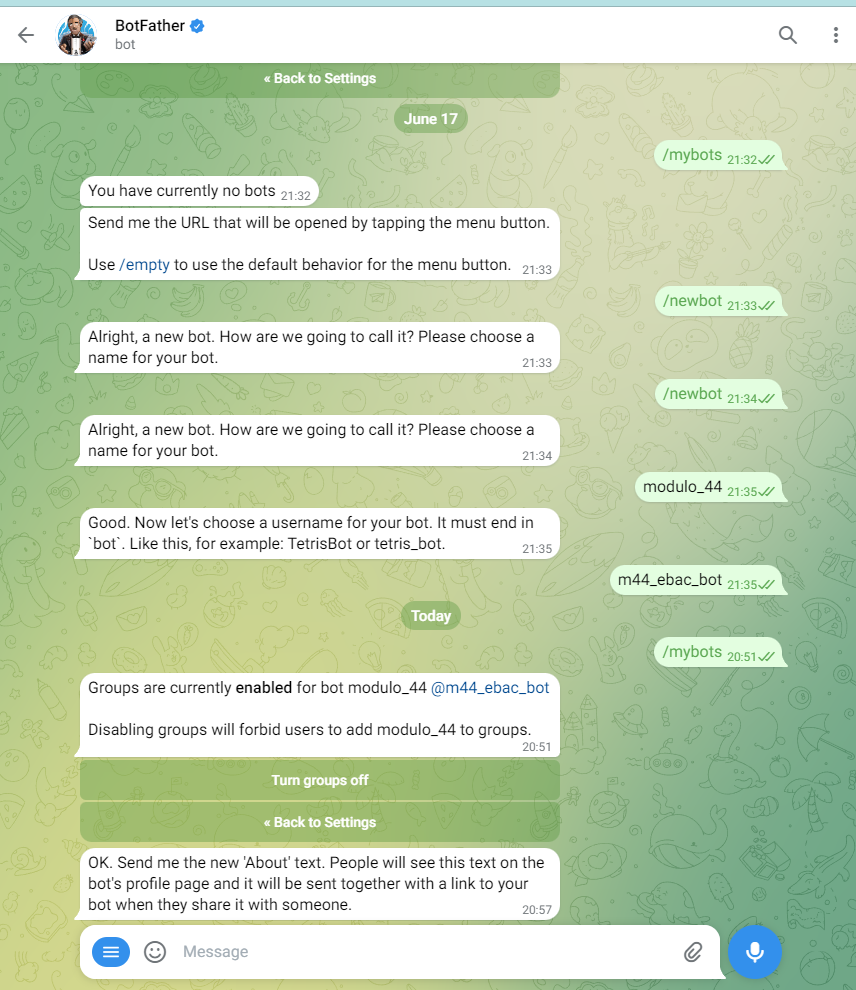

1.6. Envie diversos tipos de mensagens no grupo (text, imagem, arquivos, video, áudio, etc.) e as consuma utilizand a API de *bots* do **Telegram**.

> **Nota:** A documentação completa da API pode ser encontrada neste [link](https://core.telegram.org/bots/api)

In [ ]:
# Solução do item 1.6.

In [1]:
from getpass import getpass
import json
import requests

In [2]:
token = getpass()

··········


In [3]:
# URL do Telegram:
base_url = f'https://api.telegram.org/bot{token}'

# método GetMe:
resposta = requests.get(url=f'{base_url}/getme')
print(json.dumps(json.loads(resposta.text), indent=2))

{
  "ok": true,
  "result": {
    "id": 7398829816,
    "is_bot": true,
    "first_name": "modulo_44",
    "username": "m44_ebac_bot",
    "can_join_groups": true,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false,
    "can_connect_to_business": false
  }
}


In [4]:
# método GetUpdates (checar por conteúdos enviados):
resposta = requests.get(url=f'{base_url}/getupdates')
print(json.dumps(json.loads(resposta.text), indent=2))


{
  "ok": false,
  "error_code": 409,
  "description": "Conflict: can't use getUpdates method while webhook is active; use deleteWebhook to delete the webhook first"
}


> **Nota:** Nesse momento minha API GET ja esta ativa, por isso o metodo `getUpdates` nao funciona.

In [5]:
#Conflict: use deleteWebhook para delete o webhook.

resposta = requests.get(url=f'{base_url}/deleteWebhook')
if resposta.status_code == 200:
    print("Webhook deletado successo.")
    # método GetUpdates (checar por conteúdos enviados):
    resposta = requests.get(url=f'{base_url}/getupdates')
    print(json.dumps(json.loads(resposta.text), indent=2))
else:
    print("Error deleting webhook:", resposta.status_code)


Webhook deletado successo.
{
  "ok": true,
  "result": []
}


In [7]:
# método GetUpdates (checar por conteúdos enviados):
resposta = requests.get(url=f'{base_url}/getupdates')
print(json.dumps(json.loads(resposta.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 65510589,
      "message": {
        "message_id": 65,
        "from": {
          "id": 5812910187,
          "is_bot": false,
          "first_name": "Ricardo",
          "last_name": "Filgueiras",
          "username": "Ricardo_Fill",
          "language_code": "pt-br"
        },
        "chat": {
          "id": 5812910187,
          "first_name": "Ricardo",
          "last_name": "Filgueiras",
          "username": "Ricardo_Fill",
          "type": "private"
        },
        "date": 1719878997,
        "text": "opa"
      }
    },
    {
      "update_id": 65510590,
      "message": {
        "message_id": 66,
        "from": {
          "id": 5812910187,
          "is_bot": false,
          "first_name": "Ricardo",
          "last_name": "Filgueiras",
          "username": "Ricardo_Fill",
          "language_code": "pt-br"
        },
        "chat": {
          "id": 5812910187,
          "first_name": "Ricardo",
          "